In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Config

In [54]:
M = 7
K = 2
RESOLUTION = 10

In [55]:
p1, p2 = np.array([0, 2]), np.array([2, 2])
x = [p1[0], p2[0]]
y = [p1[1], p2[1]]

In [ ]:
def g(t, W, K):
    w_iK = 0
    total = 0
    for k in range(1, K):
        w_ik = W[k]
        w_iK -= w_ik
        
        total += w_ik * t ** k + 0
        
    total += w_iK * t ** K + 0
    
    return total
    
    
f = lambda t, W, point1, point2: (1-t)*point1 +t*point2 + g(t, W, K)

[  3.52360012 -11.01783626]


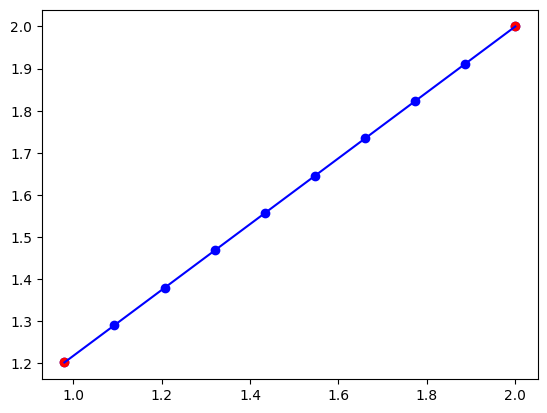

In [ ]:
samples = np.linspace(0, 1, RESOLUTION)
W = np.random.randn(K) * M
print(W)

points = np.array([f(t, W, p1, p2) for t in samples])

plt.scatter(points[:, 0], points[:, 1], color='blue')

plt.plot(points[:, 0], points[:, 1], color='blue')
    
plt.scatter(x, y, color='red')

plt.show()

In [68]:
def energy_curve(curve): #Monte Carlo Energy
    energy = 0
    n_samples = curve.shape[0] 
    return sum([np.linalg.norm(curve[idx+1] - curve[idx]) ** 2 for idx in range(n_samples - 1)]) / n_samples


In [69]:
import torch
import itertools

# latent_vec = torch.load("C:/programmering/DTU/02460-AML-Miniprojects/miniproject2/experiment/latent.pt", weights_only=True)

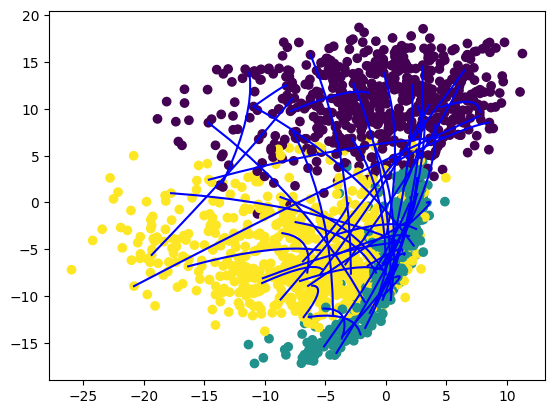

In [70]:
latent_arr = np.load("C:/programmering/DTU/02460-AML-Miniprojects/miniproject2/experiment/latent.npy")
labels = np.load("C:/programmering/DTU/02460-AML-Miniprojects/miniproject2/experiment/labels.npy")


n =latent_arr.shape[0]

combinations = list(itertools.combinations(range(n), 2))
chosen_idx_pairs = random.choices(combinations, k=50)
chosen_pairs = [latent_arr[idx, :] for idx in chosen_idx_pairs]


len(latent_arr)

plt.scatter(latent_arr[:, 0], latent_arr[:, 1], c=labels, cmap='viridis')
for pair in chosen_pairs:
    
    points = np.array([f(t, W, pair[0, :], pair[1, :]) for t in samples])

    plt.plot(points[:, 0], points[:, 1], color='blue')
plt.show()